<center> Authors: Piotr Snopek Jakub Caputa </center>

Y - national income
R - interest

In [1]:
from scipy.integrate import odeint

In [2]:
%matplotlib inline

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-white')
plt.rcParams['figure.dpi'] = 100

In [3]:
from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

%matplotlib inline

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

# Keyness model

In [4]:
def main(l0, l1, l2, l_s, alfa, beta1, beta2, beta3, beta, K, a1): 
    def I(y, r):
          return (l0 * K) / (l0 + (K - l0) * math.exp(-a1 * y))

    def S(y, r):
      return l1 * y + beta2 * r

    def L(y, r):
      return l2 * y - beta3 * r

    def f1(y, r):
      return I(y, r) - l1 * y - r * y * (beta1 + beta2)

    def f2(y, r):
      return r * (l2 * y - r * beta3 - l_s)

    def keynesian_model(params, t):
      y = params[0]
      r = params[1]
      dydt = f1(y, r) * alfa
      drdt = f2(y, r) * beta

      return [dydt, drdt]
    
    
    # initial condition
    params = [1.0, 0.1]

    # number of time points
    end = 1000

    # time points
    t = np.linspace(0, 100, end)

    # store solution
    y = np.empty_like(t)
    r = np.empty_like(t)
    Idt = np.empty_like(t)
    Sdt = np.empty_like(t)
    Ldt = np.empty_like(t)
    Mdt = np.empty_like(t)

    # record initial conditions
    y[0] = params[0]
    r[0] = params[1]
    Idt[0] = I(y[0], r[0])
    Sdt[0] = S(y[0], r[0])
    Ldt[0] = L(y[0], r[0])
    Mdt[0] = L(y[0], r[0]) - f2(y[0], r[0])

    # solve ODE
    for i in range(1, end):
        # span for next time step
        tspan = [t[i-1],t[i]]
        # solve for next step
        z = odeint(keynesian_model, params, tspan)
        # store solution for plotting
        y[i] = z[1][0]
        r[i] = z[1][1]
        Idt[i] = I(y[i], r[i])
        Sdt[i] = S(y[i], r[i])
        Ldt[i] = L(y[i], r[i])
        Mdt[i] = Ldt[i] - f2(y[i], r[i])
        # next initial condition
        params = z[1]
    
    T = 1000
    time = np.linspace(0, T, T)

    fig, ax = plt.subplots(figsize=(15, 10))

# uncomment this lines if you want to add additional information about the model    
    ax.plot(t, Idt, 'b-', label='I(t)')
    ax.plot(t, Sdt, 'r-', label='S(t)')
    ax.plot(t, Ldt, 'g-', label='L(t)')
    ax.plot(t, Mdt, 'y--', label='M(t)')
    ax.legend(loc='best', prop={'size': 15})
    plt.show()

interact(main, alfa=FloatSlider(min=0, max=10, step=0.01, value=2, description='alfa', style=style, layout=slider_layout),
               beta=FloatSlider(min=0, max=10, step=0.01, value=7, description='beta', style=style, layout=slider_layout),
               l0=FloatSlider(min=0, max=0.1, step=0.001, value=0.005, description='l0', style=style, layout=slider_layout),
               l1=FloatSlider(min=0, max=3, step=0.01, value=0.0, description='l1', style=style, layout=slider_layout),
               l2=FloatSlider(min=0, max=3, step=0.01, value=0.35, description='l2', style=style, layout=slider_layout),
               l_s=FloatSlider(min=0, max=1.5, step=0.01, value=0.2, description='l_s', style=style, layout=slider_layout),
               beta1=FloatSlider(min=0, max=2, step=0.01, value=1.6, description='beta1', style=style, layout=slider_layout),
               beta2=FloatSlider(min=0, max=1.5, step=0.01, value=0.4, description='beta2', style=style, layout=slider_layout),
               beta3=FloatSlider(min=0, max=1.5, step=0.01, value=1, description='beta3', style=style, layout=slider_layout),
               K=FloatSlider(min=0, max=10, step=0.01, value=1, description='K', style=style, layout=slider_layout),
               a1=FloatSlider(min=0, max=6, step=0.01, value=4, description='a1', style=style, layout=slider_layout)
         
        );

interactive(children=(FloatSlider(value=0.005, description='l0', layout=Layout(width='99%'), max=0.1, step=0.0…

# Model 9d

In [5]:
T = 200
t = np.linspace(0, T, T)

F = np.empty_like(t)
H = np.empty_like(t)
K = np.empty_like(t)
L = np.empty_like(t)
M = np.empty_like(t)
p = np.empty_like(t)
w = np.empty_like(t)
G_INV = np.empty_like(t)
r = np.empty_like(t)

C = np.empty_like(t)
S = np.empty_like(t)
I = np.empty_like(t)
Div = np.empty_like(t)


def main(Q1, Q2, Q3, ALPHA_R,ALPHA_P,ALPHA_M,ALPHA_F,ALPHA_INV,T_WAGE,T_EMPL,A,LAMBDA,Y_SAVE,T_DEP,G_MAX,L_MAX):
    def Model(params,t):
        F, M, H, K, L, p, w, G_INV, r = params
        if L_MAX < L:
            L_MAX_NEW = L
        else:
            L_MAX_NEW = L_MAX
    
        C = (1 - Y_SAVE * (1 + r)) * (1/p) * ALPHA_M * M # ok
        I = G_INV * (1/p) * ALPHA_F * F # ok
        D = C + I # ok
        Y = A * math.pow(L, LAMBDA) * math.pow(K, 1 - LAMBDA)
        Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok
        Le = min(L_MAX_NEW, Ld)
        S = Y_SAVE * (1 + r) * ALPHA_M * M
        PI = p * D - w * L
        Div = ALPHA_F * F - p * I
        PIn = PI - (1 / T_DEP) * p * K

        # to jest ok
        dFdt = PI + S - Div - (p * I)
        dHdt = Y - D
        dKdt = (-1/T_DEP) * K  + I
        dLdt = (-1/T_EMPL) * (L - Le)
        dMdt = ((w * L) + Div) - ((p * C) + S)
        dpdt =  -1 * ((p * ALPHA_P * H)/D)

        dwdt = (w/T_WAGE) * (Ld - L)

        if PIn/(p * K) >= r:
            dG_INVdt = ALPHA_INV * (G_MAX - G_INV) * ( ( PIn/(p * K) ) - r)
        else:
            dG_INVdt = ALPHA_INV * G_INV * ( ( PIn/(p * K) ) - r)

        drdt = ALPHA_R * r * (((w * L) + Div) - ((p * C ) + S))

        return dFdt, dMdt, dHdt, dKdt, dLdt , dpdt, dwdt, dG_INVdt, drdt
    
    F[0], M[0], H[0], K[0], L[0], p[0], w[0], G_INV[0], r[0] = 37, 58, 0, 43.5, 163.6, 1.56, 0.19, 0.46, 0.025
    params = [F[0],M[0],H[0],K[0],L[0],p[0], w[0], G_INV[0],r[0]]

    
    C[0] = (1 - Y_SAVE * (1 + r[0])) * (1/p[0]) * ALPHA_M * M[0]
    S[0] = Y_SAVE * (1 + r[0]) * ALPHA_M * M[0]
    I[0] = G_INV[0] * (1/p[0]) * ALPHA_F * F[0]
    Div[0] = ALPHA_F * F[0] - p[0] * I[0]
    
    for i in range(1, T):
        tspan = [t[i-1],t[i]]
        result = odeint(Model, params, tspan)
        F[i], M[i], H[i], K[i], L[i] , p[i], w[i], G_INV[i], r[i] = result[1]
        
        C[i] = ((1 - Y_SAVE * (1 + r[i])) * (1/p[i]) * ALPHA_M * M[i])
        S[i] = (Y_SAVE * (1 + r[i]) * ALPHA_M * M[i])
        I[i] = (G_INV[i] * (1/p[i]) * ALPHA_F * F[i])
        Div[i] = (ALPHA_F * F[i] - p[i] * I[i])

        params = result[1]
        
        
def plot_model(Q1, Q2, Q3, ALPHA_R,ALPHA_P,ALPHA_M,ALPHA_F,ALPHA_INV,
               T_WAGE,T_EMPL,A,LAMBDA,Y_SAVE,T_DEP,G_MAX,L_MAX, plot_num=['all','last']): 
    
    
    # Starting Params
    main(Q1, Q2, Q3, ALPHA_R,ALPHA_P,ALPHA_M,ALPHA_F,ALPHA_INV,T_WAGE,T_EMPL,A,LAMBDA,Y_SAVE,T_DEP,G_MAX,L_MAX)
    
    if 'all' in plot_num:
        fig, ax = plt.subplots(figsize=(15, 9))

        ax.plot(t, F, label='F(t) Liquid assets of banks and firms ')
        ax.plot(t, M, label='M(t) Money holdings of consumers ')
        ax.plot(t, K, label='K(t) Capital')
        ax.plot(t, L, label='L(t) Number of employed')
        ax.plot(t, H, label='H(t) Commodity inventories') # zapasy towarów
        ax.plot(t, w*100, label='w(t) Mean wage') 
        ax.legend(loc='best', prop={'size': 15})
        ax.grid()
        plt.show()

        print('Investments are inversely related to interest.  They increase when interest is low, national income and savings  accordingly  grow,  and  interest  starts  decreasing  to  stimulate  the  transition  from    S    to   I.    Higher  interest  puts a brake on investment activity, which in turn leads to reduction of national income.  If the interest is set too high, money holders will purchase securities.  This leads to an increase in the demand for bonds and their prices rise.  When money supply exceeds the demand for money, the interest decreases.')

        fig, ax = plt.subplots(figsize=(15, 9))
        ax.plot(t, G_INV, label='Ginv(t) Investment level')
        ax.plot(t, r, label='r(t) Interest')
        ax.plot(t, p, label='p(t) Price level')
        ax.legend(loc='best', prop={'size': 15})
        ax.grid()
        plt.show()
    
    if 'all' or 'last' in plot_num:
        fig, ax = plt.subplots(figsize=(15, 9))
        ax.plot(t, C, label='C(t) Consumption')
        ax.plot(t, S, label='S(t) Savings')
        ax.plot(t, I, label='I(t) Investments')
        ax.plot(t, Div, label='Div(t) Dividends')
        ax.legend(loc='best', prop={'size': 15})
        ax.grid()
        plt.show()
    

interact(plot_model, Q1=FloatSlider(min=0, max=100, step=0.5, value=95, description='Q1', style=style, layout=slider_layout),
               Q2=FloatSlider(min=0, max=100, step=0.5, value=95, description='Q2', style=style, layout=slider_layout),
               Q3=FloatSlider(min=0, max=100, step=0.5, value=82.635, description='Q3', style=style, layout=slider_layout),
               ALPHA_R=FloatSlider(min=0, max=3, step=0.01, value=0.1, description='ALPHA_R', style=style, layout=slider_layout),
               ALPHA_P=FloatSlider(min=0, max=1.5, step=0.01, value=0.036, description='ALPHA_P', style=style, layout=slider_layout),
               ALPHA_M=FloatSlider(min=0, max=1.5, step=0.01, value=0.8, description='ALPHA_M', style=style, layout=slider_layout),
               ALPHA_F=FloatSlider(min=0, max=1.5, step=0.01, value=0.8, description='ALPHA_F', style=style, layout=slider_layout),
               ALPHA_INV=FloatSlider(min=0, max=3, step=0.01, value=2, description='ALPHA_INV', style=style, layout=slider_layout),  
               T_WAGE=FloatSlider(min=0, max=1.5, step=0.01, value=0.1, description='T_WAGE', style=style, layout=slider_layout), 
               T_EMPL=FloatSlider(min=0, max=1.5, step=0.01, value=0.1, description='T_EMPL', style=style, layout=slider_layout),  
               A=FloatSlider(min=0, max=1.5, step=0.01, value=9.3 * 0.03, description='A', style=style, layout=slider_layout),  
               LAMBDA=FloatSlider(min=0, max=1, step=0.01, value=1, description='LAMBDA', style=style, layout=slider_layout),  
               Y_SAVE=FloatSlider(min=0, max=1.5, step=0.01, value=0.3, description='Y_SAVE', style=style, layout=slider_layout),  
               T_DEP=FloatSlider(min=0, max=6, step=0.01, value=5, description='T_DEP', style=style, layout=slider_layout),  
               G_MAX=FloatSlider(min=0, max=1.5, step=0.01, value=0.8, description='G_MAX', style=style, layout=slider_layout),  
               L_MAX=FloatSlider(min=0, max=300, step=1, value=200, description='L_MAX', style=style, layout=slider_layout)
        );

interactive(children=(FloatSlider(value=95.0, description='Q1', layout=Layout(width='99%'), step=0.5, style=Sl…

## Economic crisis:

<b> Thanks to sensitivity analysis that we prepared we were able to find parameters that somehow model the economis crisis. The results are the following: </b>

C:\Users\miugi\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


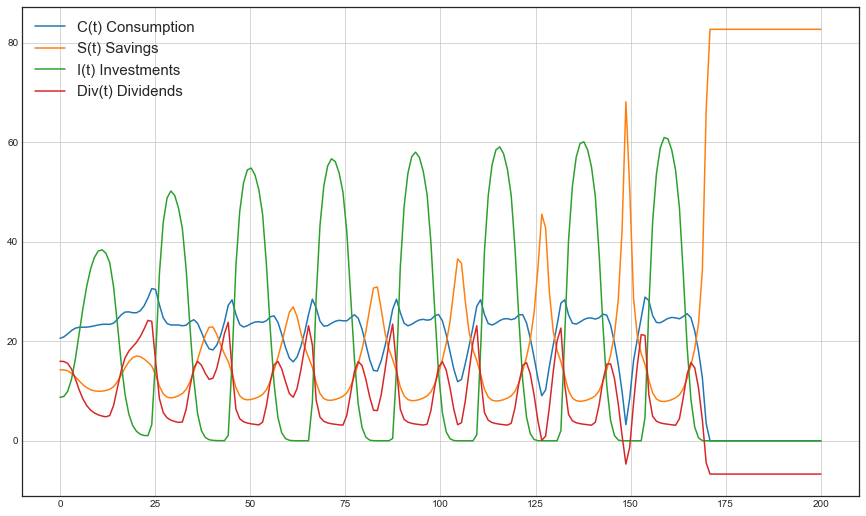

In [6]:
T=200
plot_model(95, 95, 82.635, 0.1, 0.051, 0.8, 0.8, 2, 0.1, 0.1, 9.3*0.03, 1, 0.3, 5, 0.94, 200,'last')

## SALib sensitivity analysis

<b>The analysis was done for all parameters in our model. The range was changed +- 10%.</b>

In [7]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

In [8]:
names = ['Q1', 'Q2', 'Q3', 'ALPHA_R','ALPHA_P','ALPHA_M','ALPHA_F','ALPHA_INV','T_WAGE','T_EMPL','A','LAMBDA','Y_SAVE','T_DEP','G_MAX','L_MAX']
params_start = [95, 95, 82.635, 0.1, 0.036, 0.8, 0.8, 2, 0.1, 0.1, 9.3*0.03, 1, 0.3, 5, 0.8, 200]
params_90 = [x * 0.9 for x in params_start]
params_110 = [x * 1.1 for x in params_start]

problem = {
    'num_vars': 16,
    'names': names,
    'bounds': list(map(list, zip(params_90,params_110)))
}


In [9]:
param_values = saltelli.sample(problem=problem, N=8, calc_second_order=False)

In [10]:
import pandas as pd

df = pd.DataFrame(param_values)
pd.set_option('display.max_rows', df.shape[0]+1)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,87.28125,94.40625,82.118531,0.103125,0.034425,0.875,0.805,2.1375,0.099375,0.093125,0.256331,0.98125,0.309375,5.15625,0.775,181.25
1,100.34375,94.40625,82.118531,0.103125,0.034425,0.875,0.805,2.1375,0.099375,0.093125,0.256331,0.98125,0.309375,5.15625,0.775,181.25
2,87.28125,96.78125,82.118531,0.103125,0.034425,0.875,0.805,2.1375,0.099375,0.093125,0.256331,0.98125,0.309375,5.15625,0.775,181.25
3,87.28125,94.40625,87.283219,0.103125,0.034425,0.875,0.805,2.1375,0.099375,0.093125,0.256331,0.98125,0.309375,5.15625,0.775,181.25
4,87.28125,94.40625,82.118531,0.090625,0.034425,0.875,0.805,2.1375,0.099375,0.093125,0.256331,0.98125,0.309375,5.15625,0.775,181.25
5,87.28125,94.40625,82.118531,0.103125,0.037575,0.875,0.805,2.1375,0.099375,0.093125,0.256331,0.98125,0.309375,5.15625,0.775,181.25
6,87.28125,94.40625,82.118531,0.103125,0.034425,0.865,0.805,2.1375,0.099375,0.093125,0.256331,0.98125,0.309375,5.15625,0.775,181.25
7,87.28125,94.40625,82.118531,0.103125,0.034425,0.875,0.815,2.1375,0.099375,0.093125,0.256331,0.98125,0.309375,5.15625,0.775,181.25
8,87.28125,94.40625,82.118531,0.103125,0.034425,0.875,0.805,2.0375,0.099375,0.093125,0.256331,0.98125,0.309375,5.15625,0.775,181.25
9,87.28125,94.40625,82.118531,0.103125,0.034425,0.875,0.805,2.1375,0.100625,0.093125,0.256331,0.98125,0.309375,5.15625,0.775,181.25


In [11]:
from tqdm import tqdm
T=100
Y_C = np.zeros([param_values.shape[0]])
Y_S = np.zeros([param_values.shape[0]])
Y_I = np.zeros([param_values.shape[0]])
Y_DIV = np.zeros([param_values.shape[0]])
for i, X in tqdm(enumerate(param_values)):
    main(*X)
    Y_C[i] = C[T-1]
    Y_S[i] = S[T-1]
    Y_I[i] = I[T-1]
    Y_DIV[i] = Div[T-1]

41it [00:09,  4.25it/s]C:\Users\miugi\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
144it [00:33,  4.25it/s]


In [12]:
Si_C = sobol.analyze(problem, Y_C, calc_second_order=False)
Si_S = sobol.analyze(problem, Y_S, calc_second_order=False)
Si_I = sobol.analyze(problem, Y_I, calc_second_order=False)
Si_DIV = sobol.analyze(problem, Y_DIV, calc_second_order=False)

In [13]:
np.set_printoptions(suppress=True)

In [14]:
params_avg = (Si_C['S1'] + Si_S['S1'] + Si_I['S1'] + Si_DIV['S1']) / 4
for param in zip(names,params_avg):
    output = "{:.7f}".format(param[1])
    print(f'{param[0]} - {output}')

Q1 - 0.0000000
Q2 - 0.0000000
Q3 - 0.0000000
ALPHA_R - 0.0087696
ALPHA_P - -0.2967509
ALPHA_M - -0.0128327
ALPHA_F - -0.0242721
ALPHA_INV - 0.0841319
T_WAGE - -0.0012267
T_EMPL - 0.0000368
A - 0.0434304
LAMBDA - 0.0925532
Y_SAVE - 0.0284062
T_DEP - 0.0784010
G_MAX - 0.3067800
L_MAX - -0.0000007


<b> We can observe that Q1, Q2, Q3 and L_MAX have least influence on C,S,I and Div. </b>

In [15]:
params_avg = (abs(Si_C['S1']) + abs(Si_S['S1']) + abs(Si_I['S1']) + abs(Si_DIV['S1'])) / 4
for param in zip(names,params_avg):
    output = "{:.7f}".format(param[1])
    print(f'{param[0]} - {output}')

Q1 - 0.0000000
Q2 - 0.0000000
Q3 - 0.0000000
ALPHA_R - 0.0474686
ALPHA_P - 0.3389978
ALPHA_M - 0.0128327
ALPHA_F - 0.0242721
ALPHA_INV - 0.2083028
T_WAGE - 0.0014780
T_EMPL - 0.0000930
A - 0.0666520
LAMBDA - 0.2121754
Y_SAVE - 0.0512310
T_DEP - 0.1938040
G_MAX - 0.3067800
L_MAX - 0.0000011


## Data Assimilation

<b> We used dapy framework to do Data Assimilation </b> https://github.com/thiery-lab/data-assimilation

In [16]:
import dapy.filters as filters
from dapy.models import NettoGimenoMendesModel
from dapy.models import SpatialStochasticTurbulenceModel

<b> We decided to use NettoGimenoMendesModel as example of 1D model and SpatialStochasticTurbulenceModel for 4D model </b>

In [145]:
def plot_results(results, z_reference=None, plot_traces=True, plot_region=False, 
                 trace_skip=1, trace_alpha=0.25):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
    ax.plot(results['z_mean_seq'][:, 0], 'g-', lw=1)
    if plot_region:
        ax.fill_between(
            np.arange(n_steps),
            results['z_mean_seq'][:, 0] - 3 * results['z_std_seq'][:, 0],
            results['z_mean_seq'][:, 0] + 3 * results['z_std_seq'][:, 0],
            alpha=0.25, color='g'
        )
    if plot_traces:
        ax.plot(results['z_particles_seq'][:, ::trace_skip, 0], 
                'r-', lw=0.25, alpha=trace_alpha)
    if z_reference is not None:
        ax.plot(z_reference[:, 0], 'k--')
    ax.set_ylabel('State $z$')
    ax.set_xlabel('Time index $t$')
    fig.tight_layout()
    return fig, ax

def plot_results(results, observation_time_indices, state_sequence=None, 
                 plot_particles=True, plot_region=False, 
                 particle_skip=5, trace_alpha=0.25):
    fig, ax = plt.subplots(sharex=True, figsize=(12, 4))
    ax.plot(observation_time_indices[-len(results['state_mean_sequence']):],results['state_mean_sequence'][:,0], 'g-', lw=1, label='Est. mean')
    if plot_region:
        ax.fill_between(
            observation_time_indices,
            results['state_mean_sequence'][:, 0] - 3 * results['state_std_sequence'][:, 0],
            results['state_mean_sequence'][:, 0] + 3 * results['state_std_sequence'][:, 0],
            alpha=0.25, color='g', label='Est. mean ± 3 standard deviation'
        )
    if plot_particles:
        lines = ax.plot(
            observation_time_indices[-len(results['state_mean_sequence']):], results['state_particles_sequence'][:, ::particle_skip, 0], 
            'r-', lw=0.25, alpha=trace_alpha)
        lines[0].set_label('Particles')
    if state_sequence is not None:
        ax.plot(observation_time_indices, state_sequence[:, 0], 'k--', label='Truth')
    ax.set_ylabel('$x_t$')
    ax.legend(loc='upper center', ncol=4)
    ax.set_xlabel('Time index $t$')
    fig.tight_layout()
    return fig, ax

In [146]:
enkf = filters.EnsembleKalmanFilter()

In [147]:
model_params = {
    'initial_state_mean': 10.,
    'initial_state_std': 5.,
    'state_noise_std': 1.,
    'observation_noise_std': 1., 
    'alpha': 0.5,
    'beta': 25.,
    'gamma': 8,
    'delta': 1.2,
    'epsilon': 0.05,
}
model = NettoGimenoMendesModel(**model_params)

In [148]:
T=200
t = np.linspace(0, T, T)
main(95, 95, 82.635, 0.1, 0.051, 0.8, 0.8, 2, 0.1, 0.1, 9.3*0.03, 1, 0.3, 5, 0.94, 200)
num_observation_time = T
observation_time_indices = np.linspace(0, T, T,dtype=int)

C:\Users\miugi\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [149]:
seed = 20171027
rng = np.random.default_rng(seed)

In [150]:
def gen_observation_sequence(state_sequence,power):
    X = np.random.randint(-power,power+1,size=(state_sequence.shape[0],1))
    return (state_sequence.mean(axis=1).reshape(-1,1)+X)

In [151]:
state_sequence = C.reshape(-1,1)
observation_sequence = gen_observation_sequence(state_sequence,1)

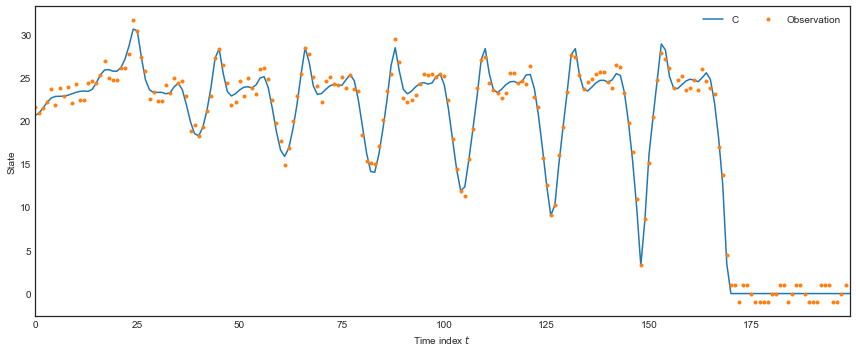

In [152]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(observation_time_indices, state_sequence)
ax.plot(observation_time_indices, observation_sequence, '.')
ax.set_xlabel('Time index $t$')
ax.set_ylabel('State')
_ = ax.set_xlim(0, num_observation_time - 1)
ax.legend(['C', 'Observation'], ncol=2)
fig.tight_layout()

<b> Observation is generated based on model output with additional random noise</b>

In [153]:
enkf = filters.EnsembleKalmanFilter()

results_enkf = enkf.filter(
    model, observation_sequence[-100:], observation_time_indices[-100:], 
    num_particle=500, rng=rng, return_particles=True)


Filtering: 100%|██████████|201/201 [00:00<00:00, 1071.22time-steps/s]

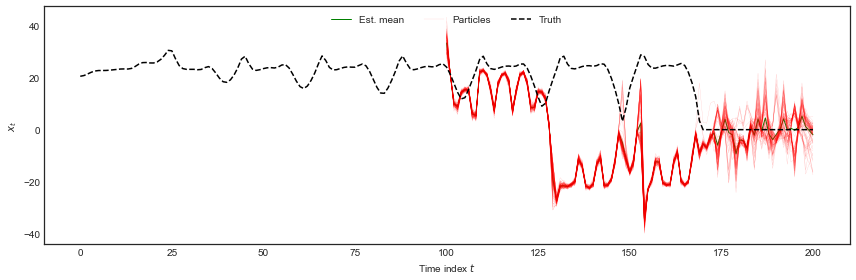

In [154]:
fig, axes = plot_results(results_enkf, observation_time_indices, state_sequence)

<b> Here we can observe that NettoGimenoMendesModel does DA in a way that the cycles are more often and it is too sensitive to urgent changes, like the one in year (Time index) 150 </b>

In [155]:
model_params = {
    'dim_state': 200,
    'observation_space_indices': slice(4, None, 8),
    'time_step': 0.25,
    'domain_extent': 1.0,
    'diffusion_coeff': 4e-5,
    'advection_coeff': 0.1,
    'damping_coeff': 0.1,
    'observation_noise_std': 0.5,
    'state_noise_amplitude': 0.1,
    'state_noise_length_scale': 4e-3,
}
model = SpatialStochasticTurbulenceModel(**model_params)

In [156]:
enkf = filters.EnsembleKalmanFilter()

In [157]:
T=200
t = np.linspace(0, T, T)
main(95, 95, 82.635, 0.1, 0.051, 0.8, 0.8, 2, 0.1, 0.1, 9.3*0.03, 1, 0.3, 5, 0.94, 200)
num_observation_time = T
observation_time_indices = np.linspace(0, T, T,dtype=int)
num_time_indices = observation_time_indices.max()
times = np.linspace(0, num_time_indices * model_params['time_step'], num_time_indices + 1)

C:\Users\miugi\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [158]:
seed = 20171027
rng = np.random.default_rng(seed)

In [159]:
state_sequence = np.concatenate((C.reshape(-1,1),S.reshape(-1,1),I.reshape(-1,1),Div.reshape(-1,1)),1)
observation_sequence = gen_observation_sequence(state_sequence,3)

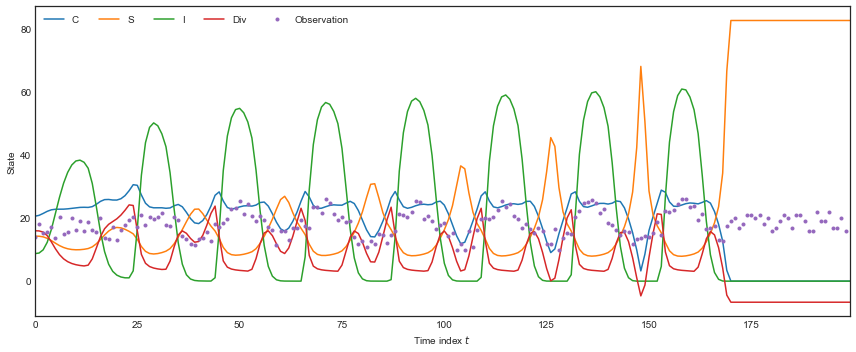

In [160]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(observation_time_indices, state_sequence)
ax.plot(observation_time_indices, observation_sequence, '.')
ax.set_xlabel('Time index $t$')
ax.set_ylabel('State')
_ = ax.set_xlim(0, num_observation_time - 1)
ax.legend(['C', 'S', 'I', 'Div', 'Observation'], ncol=5)
fig.tight_layout()

<b>
Here we can observe our economy model with economic crisis at the end with generated observation based on average of all data.
Plot displays:

    - C is Consumption
    - S is Savings
    - I is Investments
    - Div is Dividens

</b>

In [168]:
def plot_results(results, observation_time_indices, state_sequence=None, 
                 plot_particles=False, plot_region=True, 
                 particle_skip=2, trace_alpha=0.5):
    fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12, 9))
    for i, ax in zip(range(4), axes):
        ax.plot(observation_time_indices[-len(results['state_mean_sequence']):],results['state_mean_sequence'][:, i], 'g-', lw=1, label='Est. mean')
        if plot_region:
            ax.fill_between(
                observation_time_indices[-len(results['state_mean_sequence']):],
                results['state_mean_sequence'][:, i] - 15 * results['state_std_sequence'][:, i],
                results['state_mean_sequence'][:, i] + 15 * results['state_std_sequence'][:, i],
                alpha=0.25, color='g', label='Est. mean ± 15 standard deviation'
            )
        if plot_particles:
            lines = ax.plot(
                observation_time_indices[-len(results['state_mean_sequence']):], results['state_particles_sequence'][:, ::particle_skip, i], 
                'r-', lw=0.25, alpha=trace_alpha)
            lines[0].set_label('Particles')
        if state_sequence is not None:
            ax.plot(observation_time_indices, state_sequence[:, i], 'k--', label='Truth')
        ax.set_ylabel('$x_{0}$'.format(i))
        ax.legend(loc='upper center', ncol=4)
    ax.set_xlabel('Time index $t$')
    fig.tight_layout()
    return fig, axes

In [169]:
enkf = filters.EnsembleKalmanFilter()

results_enkf = enkf.filter(
    model, observation_sequence[-100:], observation_time_indices[-100:], 
    num_particle=400, rng=rng, return_particles=True)


Filtering: 100%|██████████|201/201 [00:01<00:00, 130.62time-steps/s]

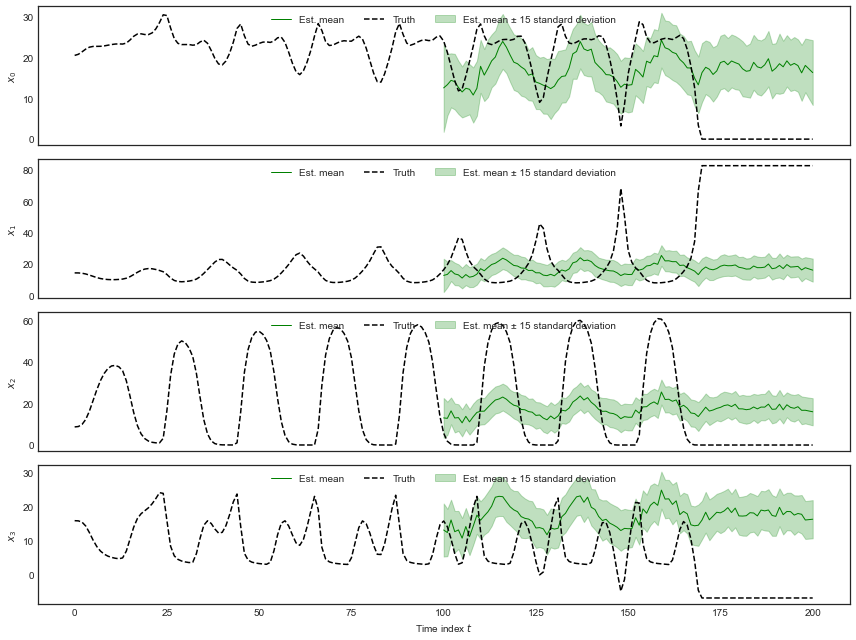

In [170]:
fig, axes = plot_results(results_enkf, observation_time_indices, state_sequence)

<b>
The output of the SpatialStochasticTurbulenceModel returns 4 plots which are ordered the same way as input:

    1. Consumption
    2. Savings
    3. Investments
    4. Dividens

    The model does the best work in the first case. However SpatialStochasticTurbulenceModel could not predict the economic crisis based on gradually increasing values of C, S, I and Div.
</b>